# Loan recommender - Hello Data Science World
Purpose: 
    * predict whether a customer can or will pay off their loan
Method: 
    * use logistic classification and regression 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
loans = pd.read_csv('LoansTrainingSet.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 19 columns):
Loan ID                         256984 non-null object
Customer ID                     256984 non-null object
Loan Status                     256984 non-null object
Current Loan Amount             256984 non-null int64
Term                            256984 non-null object
Credit Score                    195308 non-null float64
Years in current job            245508 non-null object
Home Ownership                  256984 non-null object
Annual Income                   195308 non-null float64
Purpose                         256984 non-null object
Monthly Debt                    256984 non-null object
Years of Credit History         256984 non-null float64
Months since last delinquent    116601 non-null float64
Number of Open Accounts         256984 non-null int64
Number of Credit Problems       256984 non-null int64
Current Credit Balance          256984 non-null int64
Maximum O

In [4]:
loans.groupby(['Customer ID','Loan ID']).size()

Customer ID                           Loan ID                             
00003c89-d86a-48a2-9f95-e1ec9d488ee1  c618eb4d-5592-425a-90b3-0f94afb6c69d    1
000053a0-606e-46ad-b297-9d9b4f87c437  82de6a1e-0561-40e9-925f-aa6f6a4fee81    1
0000ca79-1128-40c7-ba50-f3638574e8ec  8acb084b-3781-4a46-a1b6-1ff1013f2853    1
0000e2fb-006e-420e-8b9c-8fda23bfdb5a  b896e1d7-4a12-49dd-b5f1-068658af60de    1
0000ec2e-59e9-4d50-89cc-da5e5ffd6f25  4b4119d6-2d24-4f8f-8034-92585e619ab9    1
                                                                             ..
fffec899-76a6-4437-83c1-46fab0621308  556ade6a-8f82-41dc-a0a3-9794d1f993a5    2
fffef78a-60b3-4778-b8bb-d2467595ed53  ff3bf8c8-eda5-47fa-81fc-e7d36f0ca6fd    2
ffff610c-85ba-49fd-9005-8ce90785ff25  f6626b9b-6311-4512-8eb6-f3e846e9b3cc    2
ffff6cf8-4779-48be-9fc1-5a93b6e16c2d  a71d4b6e-3da7-45ae-9db6-d8aece68e4ae    1
ffffc64c-8637-4a08-b2e7-5b67bd8da124  3df6ff34-a3b4-49f4-a72a-e23fc77f4072    1
Length: 215700, dtype: int64

# Separating Data to Remove duplicate loan IDs, then merging on median 

In [5]:
loans_obj = loans.select_dtypes(include='object')

In [6]:
loans_num = loans.select_dtypes(exclude='object')

In [7]:
loans_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 9 columns):
Loan ID                 256984 non-null object
Customer ID             256984 non-null object
Loan Status             256984 non-null object
Term                    256984 non-null object
Years in current job    245508 non-null object
Home Ownership          256984 non-null object
Purpose                 256984 non-null object
Monthly Debt            256984 non-null object
Maximum Open Credit     256984 non-null object
dtypes: object(9)
memory usage: 17.6+ MB


In [8]:
loans_obj.drop_duplicates(subset='Loan ID', inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
loans_obj.shape

(215700, 9)

* add Loan ID values to dataframe loans numeric

In [10]:
loans_num.loc[:,'Loan ID'] = loans.loc[:,'Loan ID'].values

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:480: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [11]:
loans_num.head()

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens,Loan ID
0,11520,741.0,33694.0,12.3,41.0,10,0,6760,0.0,0.0,000025bb-5694-4cff-b17d-192b1a98ba44
1,3441,734.0,42269.0,26.3,NaN,17,0,6262,0.0,0.0,00002c49-3a29-4bd4-8f67-c8f8fbc1048c
2,21029,747.0,90126.0,28.8,NaN,5,0,20967,0.0,0.0,00002d89-27f3-409b-aa76-90834f359a65
3,18743,747.0,38072.0,26.2,NaN,9,0,22529,0.0,0.0,00005222-b4d8-45a4-ad8c-186057e24233
4,11731,746.0,50025.0,11.5,NaN,12,0,17391,0.0,0.0,0000757f-a121-41ed-b17b-162e76647c1f


In [12]:
loans_num_grouped = loans_num.groupby('Loan ID').max()

In [13]:
loans[loans.duplicated(['Loan ID'])].shape

(41284, 19)

In [14]:
loans_num_grouped.head()

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
Loan ID,,,,,,,,,,
000025bb-5694-4cff-b17d-192b1a98ba44,11520,741.0,33694.0,12.3,41.0,10,0,6760,0.0,0.0
00002c49-3a29-4bd4-8f67-c8f8fbc1048c,3441,734.0,42269.0,26.3,NaN,17,0,6262,0.0,0.0
00002d89-27f3-409b-aa76-90834f359a65,21029,747.0,90126.0,28.8,NaN,5,0,20967,0.0,0.0
00005222-b4d8-45a4-ad8c-186057e24233,18743,747.0,38072.0,26.2,NaN,9,0,22529,0.0,0.0
0000757f-a121-41ed-b17b-162e76647c1f,11731,746.0,50025.0,11.5,NaN,12,0,17391,0.0,0.0


In [15]:
loans_num_grouped.reset_index(inplace=True)

In [16]:
loans_num_grouped.head()

,Loan ID,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,11520,741.0,33694.0,12.3,41.0,10,0,6760,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,3441,734.0,42269.0,26.3,NaN,17,0,6262,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,21029,747.0,90126.0,28.8,NaN,5,0,20967,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,18743,747.0,38072.0,26.2,NaN,9,0,22529,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,11731,746.0,50025.0,11.5,NaN,12,0,17391,0.0,0.0


In [17]:
loans2 = pd.merge(loans_num_grouped,loans_obj,how='left',on=['Loan ID'])

In [18]:
loans[loans['Loan ID'] == '776002e9-24b7-4a34-bbf3-1f0d5b863455']

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
120062,776002e9-24b7-4a34-bbf3-1f0d5b863455,0408df98-338d-40a2-be48-f86e3b7f1e06,Charged Off,4858,Short Term,NaN,10+ years,Rent,NaN,Debt Consolidation,$785.12,19.4,55.0,9,1,3090,6281,0.0,0.0
120063,776002e9-24b7-4a34-bbf3-1f0d5b863455,0408df98-338d-40a2-be48-f86e3b7f1e06,Charged Off,4862,Short Term,704.0,10+ years,Rent,39292.0,Debt Consolidation,$785.84,19.4,55.0,9,1,3093,6287,0.0,0.0
120064,776002e9-24b7-4a34-bbf3-1f0d5b863455,0408df98-338d-40a2-be48-f86e3b7f1e06,Charged Off,4862,Short Term,704.0,10+ years,Rent,39292.0,Debt Consolidation,$785.84,19.4,55.0,9,1,3093,6287,0.0,0.0
120065,776002e9-24b7-4a34-bbf3-1f0d5b863455,0408df98-338d-40a2-be48-f86e3b7f1e06,Charged Off,4858,Short Term,704.0,10+ years,Rent,39256.0,Debt Consolidation,$785.12,19.4,55.0,9,1,3090,6281,0.0,0.0


In [19]:
loans2[loans2['Loan ID'] == '776002e9-24b7-4a34-bbf3-1f0d5b863455']

,Loan ID,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens,Customer ID,Loan Status,Term,Years in current job,Home Ownership,Purpose,Monthly Debt,Maximum Open Credit
100585,776002e9-24b7-4a34-bbf3-1f0d5b863455,4862,704.0,39292.0,19.4,55.0,9,1,3093,0.0,0.0,0408df98-338d-40a2-be48-f86e3b7f1e06,Charged Off,Short Term,10+ years,Rent,Debt Consolidation,$785.12,6281


#  Further data cleaning on loans2 - duplicate loan ids removed

* continually looping back to below info and data visualizations to make sure loans data cleaned and complete

In [20]:
loans2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215700 entries, 0 to 215699
Data columns (total 19 columns):
Loan ID                         215700 non-null object
Current Loan Amount             215700 non-null int64
Credit Score                    171202 non-null float64
Annual Income                   171202 non-null float64
Years of Credit History         215700 non-null float64
Months since last delinquent    97438 non-null float64
Number of Open Accounts         215700 non-null int64
Number of Credit Problems       215700 non-null int64
Current Credit Balance          215700 non-null int64
Bankruptcies                    215248 non-null float64
Tax Liens                       215678 non-null float64
Customer ID                     215700 non-null object
Loan Status                     215700 non-null object
Term                            215700 non-null object
Years in current job            206710 non-null object
Home Ownership                  215700 non-null object
Purpose 

Maximum Open Credit, Monthly Debt and Years in current job should be float

In [21]:
loans2['Maximum Open Credit'] = pd.to_numeric(loans2['Maximum Open Credit'], errors='coerce')

In [22]:
loans2['Maximum Open Credit'].fillna(loans2['Maximum Open Credit'].mode()[0], inplace=True)

In [23]:
loans2[loans2['Maximum Open Credit'].isnull() == True]

,Loan ID,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens,Customer ID,Loan Status,Term,Years in current job,Home Ownership,Purpose,Monthly Debt,Maximum Open Credit


In [24]:
loans2['Monthly Debt'] = loans2['Monthly Debt'].str.replace(',', '')
loans2['Monthly Debt'] = loans2['Monthly Debt'].str.replace('$', '')

In [25]:
loans2['Monthly Debt']= loans2['Monthly Debt'].astype(float)

In [26]:
loans2['Credit Score'] = loans2['Credit Score'].apply(lambda x: x/10 if x > 850 else x)
loans2[loans['Credit Score'] > 850]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,Loan ID,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens,Customer ID,Loan Status,Term,Years in current job,Home Ownership,Purpose,Monthly Debt,Maximum Open Credit
6,0000afa6-8902-4f8f-b870-25a8fdad0aeb,24613,664.0,49225.0,17.6,73.0,7,0,14123,0.0,0.0,e49c1a82-a0f7-45e8-9f46-2f75c43f9fbc,Charged Off,Long Term,6 years,Rent,Business Loan,542.29,16954.0
55,000e9be4-ef1d-47c2-b184-cb03b6880c0d,12211,744.0,58003.0,16.5,NaN,9,0,27017,0.0,0.0,d521d7bb-480a-4cdf-8517-2f579723cd05,Fully Paid,Short Term,3 years,Home Mortgage,Debt Consolidation,671.87,40935.0
71,0015d4be-c394-4e00-af60-75f89cf0c6cb,6904,738.0,93699.0,12.5,67.0,9,0,2389,0.0,0.0,12dac865-cb98-41cd-94f4-a17524e920ac,Fully Paid,Short Term,4 years,Rent,Debt Consolidation,680.87,7109.0
73,00163613-1360-4e43-8fbc-7818032510b7,5041,737.0,51147.0,10.9,NaN,11,0,3644,0.0,0.0,2eba693e-f810-459d-8df7-9a2376138466,Charged Off,Short Term,2 years,Rent,Debt Consolidation,613.77,4428.0
79,0017ddc4-0232-441e-a01d-6b5bb67d0cc8,1971,746.0,39420.0,22.0,43.0,7,0,8256,0.0,0.0,7668401c-2bf7-4edd-8233-c910d87fc0ca,Fully Paid,Short Term,NaN,Home Mortgage,Home Improvements,768.69,17163.0
84,001a853a-9c59-4450-8850-2df07ff2b115,23451,742.0,127450.0,20.4,NaN,13,0,20561,0.0,0.0,34876ca9-b51e-4b72-854c-4b298d5debd0,Fully Paid,Short Term,5 years,Home Mortgage,Debt Consolidation,1954.24,68767.0
88,001b1a2d-ea74-4865-bf5a-3ac43498d33b,26624,747.0,107520.0,19.5,NaN,8,0,35923,0.0,0.0,9312e30e-8cf3-4ed9-9c23-7d3cb952b400,Fully Paid,Short Term,7 years,Home Mortgage,Debt Consolidation,873.61,57569.0
112,00231995-013e-433c-ac1f-52c9ae0a4916,34598,713.0,94896.0,21.4,NaN,16,0,25609,0.0,0.0,71080b8a-7998-41c8-b328-9ce757210295,Fully Paid,Long Term,10+ years,Home Mortgage,Home Improvements,1810.93,36795.0
126,0026f2d2-d190-4ce8-8911-89b88b1d3331,99999999,709.0,51267.0,21.9,NaN,6,0,12430,0.0,0.0,c48c79e2-7265-45c0-860e-24bedb63aa9f,Fully Paid,Long Term,7 years,Own Home,Debt Consolidation,1375.66,20017.0
133,00291dfe-e40a-4791-acc8-a322ee3d9b72,6017,713.0,44128.0,8.9,NaN,12,0,7263,0.0,0.0,835f15b4-ccea-46fb-9a1f-1ccda42ae737,Charged Off,Short Term,4 years,Rent,other,448.63,19736.0


In [27]:
loans2['Years in current job']

0         10+ years
1           4 years
2         10+ years
3         10+ years
4           4 years
            ...    
215695    10+ years
215696      2 years
215697    10+ years
215698      9 years
215699    10+ years
Name: Years in current job, Length: 215700, dtype: object

In [28]:
loans2['Years in current job'] = loans2['Years in current job'].str.extract('(\d+)')

In [29]:
loans2['Years in current job']= loans2['Years in current job'].astype(float)

In [30]:
loans2['Years in current job'].fillna(loans2['Years in current job'].mode()[0], inplace=True)

Some incorrect high Current Loan Amounts ???

In [31]:
loans2['Current Loan Amount'].describe()

count    2.157000e+05
mean     1.633515e+07
std      3.695307e+07
min      5.050000e+02
25%      8.329000e+03
50%      1.464200e+04
75%      2.520825e+04
max      1.000000e+08
Name: Current Loan Amount, dtype: float64

(array([180490.,  35210.]),
 array([5.0500000e+02, 5.0000252e+07, 9.9999999e+07]),
 <a list of 2 Patch objects>)

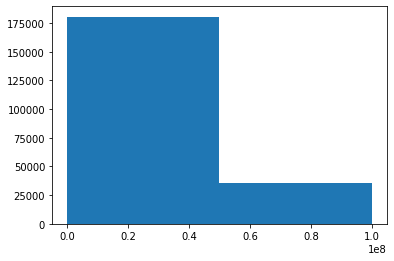

In [32]:
plt.hist(loans2['Current Loan Amount'], bins=2)

(array([55621., 69587., 34917., 13528.,  6837.]),
 array([  505.,  8604., 16703., 24802., 32901., 41000.]),
 <a list of 5 Patch objects>)

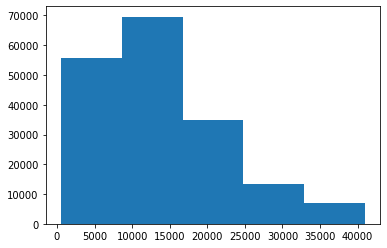

In [33]:
trueLoanAmt = loans2[loans2['Current Loan Amount'] < 9000000]
loan_mean = trueLoanAmt['Current Loan Amount'].mean()
plt.hist(trueLoanAmt['Current Loan Amount'], bins=5)

16335150.87126101


16335150.87126101

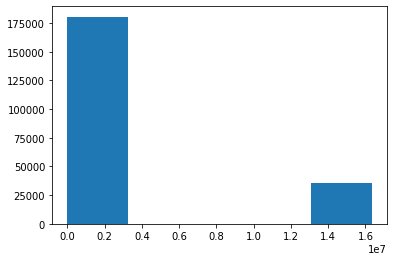

In [34]:
loan_mean = loans2['Current Loan Amount'].mean()
print(loan_mean)
loans2['Current Loan Amount'] = loans2['Current Loan Amount'].apply(lambda x: loan_mean if x > 9000000 else x)
plt.hist(loans2['Current Loan Amount'], bins=5)
loan_mean

In [35]:
loans2['Current Loan Amount'].describe()

count    2.157000e+05
mean     2.678038e+06
std      6.032074e+06
min      5.050000e+02
25%      8.329000e+03
50%      1.464200e+04
75%      2.520825e+04
max      1.633515e+07
Name: Current Loan Amount, dtype: float64

In [36]:
loans2['Months since last delinquent'].fillna(0, inplace=True)
loans2['Bankruptcies'].fillna(0, inplace=True)
loans2['Tax Liens'].fillna(0, inplace=True)

In [37]:
loans2['Loan Status'] = loans2['Loan Status'].apply(lambda x: float(1.0) if x=='Fully Paid' else float(0.0))

# Data Visualization: An attempt to understand the data

In [38]:
delinquentPaid = loans2[loans2['Loan Status'] == 1.0]
delinquentCharged = loans2[loans2['Loan Status'] == 0.0]

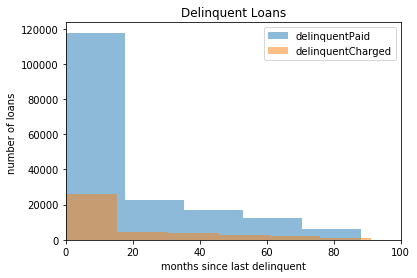

In [39]:
plt.hist(delinquentPaid['Months since last delinquent'], alpha=0.5,label='delinquentPaid')
plt.hist(delinquentCharged['Months since last delinquent'], alpha=0.5, label='delinquentCharged')
plt.xlabel('months since last delinquent')
plt.ylabel('number of loans ')
plt.xlim(0,100)
plt.title('Delinquent Loans')
plt.legend();

More delinquent loans are Fully Paid then not due to Banks vetting already. Banks can make money extra money with late fees or group loans into Debt Consolidation. Charged off number of loan amounts must be << Fully Paid loan amounts. There is risk. Banks don't want loans paid off early either.

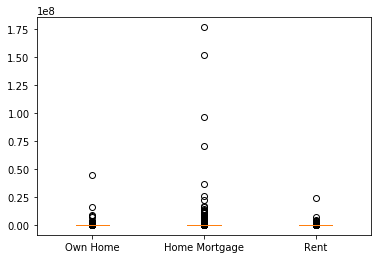

In [40]:
plt.boxplot([loans2[loans2['Home Ownership']=='Own Home']['Maximum Open Credit'],
           loans2[loans2['Home Ownership']=='Home Mortgage']['Maximum Open Credit'],
           loans2[loans2['Home Ownership']=='Rent']['Maximum Open Credit']],
           labels = ['Own Home', 'Home Mortgage','Rent']);

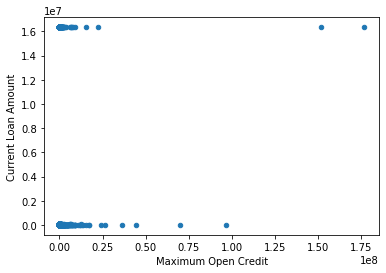

In [41]:
# maximum open credit could provide Credit Score and Annual Income information
loans2.plot.scatter(x='Maximum Open Credit', y="Current Loan Amount") #conclusion is that it is not helpful

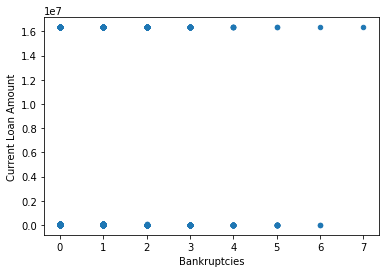

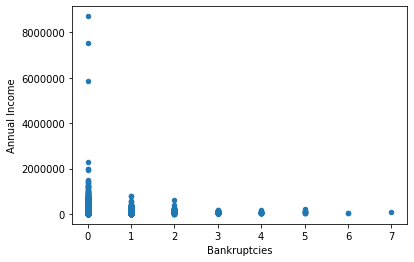

In [42]:
loans2.plot.scatter(x='Bankruptcies', y="Current Loan Amount")
loans2.plot.scatter(x='Bankruptcies', y="Annual Income")

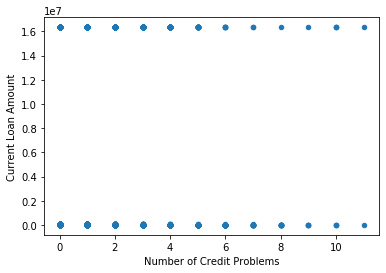

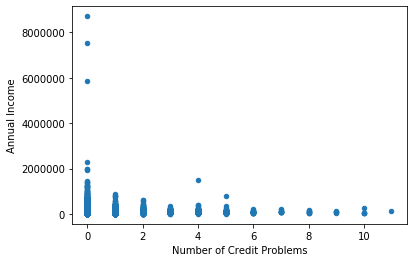

In [43]:
loans2.plot.scatter(x='Number of Credit Problems', y="Current Loan Amount")
loans2.plot.scatter(x='Number of Credit Problems', y="Annual Income")

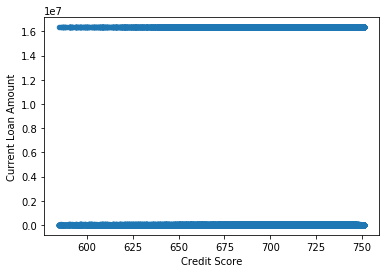

In [44]:
loans2.plot.scatter(x='Credit Score', y="Current Loan Amount")

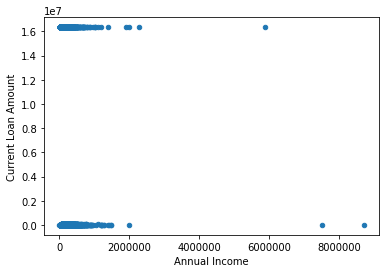

In [45]:
loans2.plot.scatter(x='Annual Income', y="Current Loan Amount")

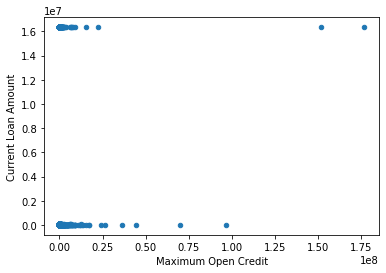

In [46]:
loans2.plot.scatter(x='Maximum Open Credit', y="Current Loan Amount")

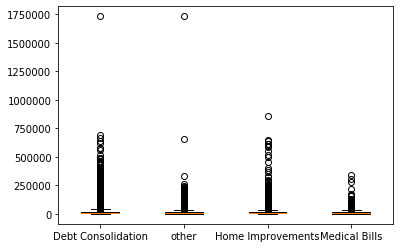

In [47]:
plt.boxplot([loans2[loans2['Purpose']=='Debt Consolidation']['Current Credit Balance'],
           loans2[loans2['Purpose']=='other']['Current Credit Balance'],
           loans2[loans2['Purpose']=='Home Improvements']['Current Credit Balance'],
           loans2[loans2['Purpose']=='Medical Bills']['Current Credit Balance']],
           labels = ['Debt Consolidation', 'other','Home Improvements','Medical Bills']);

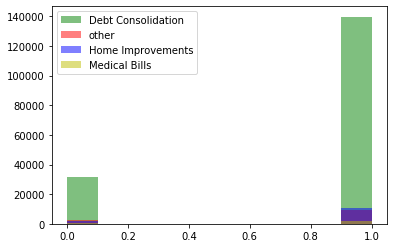

In [48]:
plt.hist(loans2['Loan Status'][loans2['Purpose']=='Debt Consolidation'], color='g', alpha=0.5, label='Debt Consolidation')
plt.hist(loans2['Loan Status'][loans2['Purpose']=='other'], color='r', alpha=0.5, label='other')
plt.hist(loans2['Loan Status'][loans2['Purpose']=='Home Improvements'], color='b', alpha=0.5, label='Home Improvements')
plt.hist(loans2['Loan Status'][loans2['Purpose']=='Medical Bills'], color='y', alpha=0.5, label='Medical Bills')
plt.legend();

Although the visualizations were interesting, an equation to fill the most important features 'Credit Score' and 'Annual Income' was not found.

In [49]:
loans2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215700 entries, 0 to 215699
Data columns (total 19 columns):
Loan ID                         215700 non-null object
Current Loan Amount             215700 non-null float64
Credit Score                    171202 non-null float64
Annual Income                   171202 non-null float64
Years of Credit History         215700 non-null float64
Months since last delinquent    215700 non-null float64
Number of Open Accounts         215700 non-null int64
Number of Credit Problems       215700 non-null int64
Current Credit Balance          215700 non-null int64
Bankruptcies                    215700 non-null float64
Tax Liens                       215700 non-null float64
Customer ID                     215700 non-null object
Loan Status                     215700 non-null float64
Term                            215700 non-null object
Years in current job            215700 non-null float64
Home Ownership                  215700 non-null object
Pur

In [50]:
loans2.dropna(inplace=True)
loans2.drop(['Loan ID', 'Customer ID'], axis=1, inplace=True)

In [51]:
loans2.head()

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens,Loan Status,Term,Years in current job,Home Ownership,Purpose,Monthly Debt,Maximum Open Credit
0,11520.0,741.0,33694.0,12.3,41.0,10,0,6760,0.0,0.0,1.0,Short Term,10.0,Home Mortgage,Debt Consolidation,584.03,16056.0
1,3441.0,734.0,42269.0,26.3,0.0,17,0,6262,0.0,0.0,1.0,Short Term,4.0,Home Mortgage,other,1106.04,19149.0
2,21029.0,747.0,90126.0,28.8,0.0,5,0,20967,0.0,0.0,1.0,Short Term,10.0,Home Mortgage,Debt Consolidation,1321.85,28335.0
3,18743.0,747.0,38072.0,26.2,0.0,9,0,22529,0.0,0.0,1.0,Short Term,10.0,Own Home,Debt Consolidation,751.92,43915.0
4,11731.0,746.0,50025.0,11.5,0.0,12,0,17391,0.0,0.0,1.0,Short Term,4.0,Rent,Debt Consolidation,355.18,37081.0


In [52]:
loanbool = []
loanAmt = []
all_features = list(loans2.columns)
all_features.remove('Loan Status')
loanbool = all_features
all_features.remove('Maximum Open Credit')
loanAmt = all_features
loanAmt

['Current Loan Amount',
 'Credit Score',
 'Annual Income',
 'Years of Credit History',
 'Months since last delinquent',
 'Number of Open Accounts',
 'Number of Credit Problems',
 'Current Credit Balance',
 'Bankruptcies',
 'Tax Liens',
 'Term',
 'Years in current job',
 'Home Ownership',
 'Purpose',
 'Monthly Debt']

# Inspect Feature importance with Random Forest

In [53]:
from sklearn.ensemble import RandomForestRegressor

In [54]:
(loans2.corr())["Loan Status"].sort_values(ascending = False)

Loan Status                     1.000000
Current Loan Amount             0.268118
Credit Score                    0.245848
Annual Income                   0.064451
Years of Credit History         0.031591
Maximum Open Credit             0.006376
Current Credit Balance          0.006094
Bankruptcies                    0.000869
Months since last delinquent   -0.001072
Years in current job           -0.006162
Number of Credit Problems      -0.008858
Tax Liens                      -0.011359
Monthly Debt                   -0.016518
Number of Open Accounts        -0.020228
Name: Loan Status, dtype: float64

In [55]:
(loans2.corr())["Maximum Open Credit"].sort_values(ascending = False)

Maximum Open Credit             1.000000
Current Credit Balance          0.100369
Annual Income                   0.031687
Monthly Debt                    0.021465
Years of Credit History         0.019537
Number of Open Accounts         0.015206
Credit Score                    0.010205
Loan Status                     0.006376
Current Loan Amount             0.005655
Years in current job            0.002138
Tax Liens                      -0.000957
Months since last delinquent   -0.002904
Number of Credit Problems      -0.008123
Bankruptcies                   -0.009163
Name: Maximum Open Credit, dtype: float64

In [56]:
target = loans2['Loan Status']
features = loans2[loanbool]
target_amt = loans2['Maximum Open Credit']
features_amt = loans2[loanAmt]
features.head()

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens,Term,Years in current job,Home Ownership,Purpose,Monthly Debt
0,11520.0,741.0,33694.0,12.3,41.0,10,0,6760,0.0,0.0,Short Term,10.0,Home Mortgage,Debt Consolidation,584.03
1,3441.0,734.0,42269.0,26.3,0.0,17,0,6262,0.0,0.0,Short Term,4.0,Home Mortgage,other,1106.04
2,21029.0,747.0,90126.0,28.8,0.0,5,0,20967,0.0,0.0,Short Term,10.0,Home Mortgage,Debt Consolidation,1321.85
3,18743.0,747.0,38072.0,26.2,0.0,9,0,22529,0.0,0.0,Short Term,10.0,Own Home,Debt Consolidation,751.92
4,11731.0,746.0,50025.0,11.5,0.0,12,0,17391,0.0,0.0,Short Term,4.0,Rent,Debt Consolidation,355.18


FEATURE IMPORTANCE FOR LOAN STATUS

In [57]:
features = pd.get_dummies(features,drop_first=True)
featuresList = list(features.columns)
features_amt = pd.get_dummies(features_amt,drop_first=True)
featuresAmtList = list(features_amt.columns)
featuresAmtList

['Current Loan Amount',
 'Credit Score',
 'Annual Income',
 'Years of Credit History',
 'Months since last delinquent',
 'Number of Open Accounts',
 'Number of Credit Problems',
 'Current Credit Balance',
 'Bankruptcies',
 'Tax Liens',
 'Years in current job',
 'Monthly Debt',
 'Term_Short Term',
 'Home Ownership_Home Mortgage',
 'Home Ownership_Own Home',
 'Home Ownership_Rent',
 'Purpose_Buy House',
 'Purpose_Buy a Car',
 'Purpose_Debt Consolidation',
 'Purpose_Educational Expenses',
 'Purpose_Home Improvements',
 'Purpose_Medical Bills',
 'Purpose_Other',
 'Purpose_Take a Trip',
 'Purpose_other']

In [58]:
features.head()

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens,...,Home Ownership_Rent,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_other
0,11520.0,741.0,33694.0,12.3,41.0,10,0,6760,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
1,3441.0,734.0,42269.0,26.3,0.0,17,0,6262,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,21029.0,747.0,90126.0,28.8,0.0,5,0,20967,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
3,18743.0,747.0,38072.0,26.2,0.0,9,0,22529,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
4,11731.0,746.0,50025.0,11.5,0.0,12,0,17391,0.0,0.0,...,1,0,0,1,0,0,0,0,0,0


In [59]:
rf = RandomForestRegressor()
rf.fit(features, target.values.ravel())
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), featuresList), 
             reverse=True))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Features sorted by their score:
[(0.1852, 'Current Loan Amount'), (0.131, 'Credit Score'), (0.1256, 'Annual Income'), (0.1158, 'Monthly Debt'), (0.113, 'Current Credit Balance'), (0.1036, 'Years of Credit History'), (0.064, 'Number of Open Accounts'), (0.0504, 'Months since last delinquent'), (0.0401, 'Years in current job'), (0.0085, 'Home Ownership_Rent'), (0.0073, 'Home Ownership_Home Mortgage'), (0.0072, 'Term_Short Term'), (0.0069, 'Number of Credit Problems'), (0.0067, 'Purpose_Debt Consolidation'), (0.0061, 'Bankruptcies'), (0.0057, 'Home Ownership_Own Home'), (0.0051, 'Purpose_other'), (0.0049, 'Purpose_Home Improvements'), (0.0037, 'Purpose_Other'), (0.0029, 'Tax Liens'), (0.0021, 'Purpose_Medical Bills'), (0.0015, 'Purpose_Buy a Car'), (0.0013, 'Purpose_Buy House'), (0.0011, 'Purpose_Take a Trip'), (0.0003, 'Purpose_Educational Expenses')]


FEATURE IMPORTANCE FOR LOAN AMOUNT

In [60]:
rf = RandomForestRegressor()
rf.fit(features_amt, target_amt.values.ravel())
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), featuresAmtList), 
             reverse=True))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Features sorted by their score:
[(0.3557, 'Current Credit Balance'), (0.2244, 'Years of Credit History'), (0.1396, 'Monthly Debt'), (0.0702, 'Number of Open Accounts'), (0.0624, 'Credit Score'), (0.0456, 'Months since last delinquent'), (0.0322, 'Purpose_Debt Consolidation'), (0.0249, 'Annual Income'), (0.0205, 'Purpose_Other'), (0.0147, 'Current Loan Amount'), (0.0022, 'Years in current job'), (0.0018, 'Purpose_other'), (0.0012, 'Home Ownership_Rent'), (0.0012, 'Home Ownership_Own Home'), (0.0008, 'Purpose_Buy a Car'), (0.0005, 'Purpose_Buy House'), (0.0005, 'Home Ownership_Home Mortgage'), (0.0003, 'Purpose_Medical Bills'), (0.0003, 'Purpose_Home Improvements'), (0.0003, 'Bankruptcies'), (0.0002, 'Tax Liens'), (0.0002, 'Purpose_Take a Trip'), (0.0001, 'Term_Short Term'), (0.0001, 'Number of Credit Problems'), (0.0, 'Purpose_Educational Expenses')]


In [61]:
features = features[['Current Loan Amount', 'Credit Score', 'Annual Income']]
features_amt = features_amt[['Current Credit Balance', 'Years of Credit History','Monthly Debt']]
features_amt.head()

,Current Credit Balance,Years of Credit History,Monthly Debt
0,6760,12.3,584.03
1,6262,26.3,1106.04
2,20967,28.8,1321.85
3,22529,26.2,751.92
4,17391,11.5,355.18


# Create Model

In [62]:
#!pip install xgboost

# Loan qualification

In [63]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.linear_model import SGDClassifier
g=GaussianNB()
b=BernoulliNB()
k = KNeighborsClassifier()
log = LogisticRegression()
d = DecisionTreeClassifier()
r = RandomForestClassifier()
gbc = GradientBoostingClassifier()
xgbc = XGBClassifier()
sgd = SGDClassifier()
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_validate,GridSearchCV  #Additional

In [64]:
algorithms = [g,b,k,log,d,r,gbc,xgbc,sgd]
names = ['GaussianNB', 'BernoulliNB', 'K Nearest', 'Logistic','Single Tree','Random Forest','Gradient Boost','XGBoost','Stochastic Gradient Descent']

In [65]:
def tDMasses(X=features,y=target,algorithms=algorithms,names=names):   
    #fit the data
    for i in range(len(algorithms)):
        algorithms[i]=algorithms[i].fit(X,y)
    #print metrics
    accuracy = []
    precision = []
    recall = []
    f1 = []
    for i in range(len(algorithms)):
        if accuracy_score(y,algorithms[i].predict(X))==1:
                           accuracy.append(0)
        else:
            accuracy.append(accuracy_score(y,algorithms[i].predict(X)))
        if precision_score(y,algorithms[i].predict(X))==1:
                           precision.append(0)
        else:
                            precision.append(precision_score(y,algorithms[i].predict(X)))
        if recall_score(y,algorithms[i].predict(X))==1:
                           recall.append(0)
        else:
                           recall.append(recall_score(y,algorithms[i].predict(X)))
        if f1_score(y,algorithms[i].predict(X))==1:
                         f1.append(0)
        else: 
                         f1.append(f1_score(y,algorithms[i].predict(X)))
                         
    metrics = pd.DataFrame(columns = ['Accuracy', 'Precision', 'Recall', 'F1'],index = names)
    metrics['Accuracy'] = accuracy
    metrics['Precision'] = precision
    metrics['Recall'] = recall
    metrics['F1'] = f1
    return metrics.sort_values('F1', ascending = False)

In [66]:
tDMasses(features,target,algorithms,names)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,Accuracy,Precision,Recall,F1
Single Tree,0.999755,0.000000,0.999687,0.999843
Random Forest,0.987664,0.991429,0.992820,0.992124
K Nearest,0.820037,0.840763,0.949963,0.892033
XGBoost,0.789670,0.801773,0.971407,0.878476
Gradient Boost,0.789880,0.802914,0.969481,0.878371
BernoulliNB,0.782602,0.782601,0.000000,0.878044
Logistic,0.782596,0.782596,0.000000,0.878041
Stochastic Gradient Descent,0.733035,0.781311,0.914974,0.842876
GaussianNB,0.423067,0.000000,0.262796,0.416214


K Nearest has the best scores. Random Forest is too perfect and over fitting. Gradient Boost, XGBoost and BernoulliNB are basically equal close behind K Nearest.

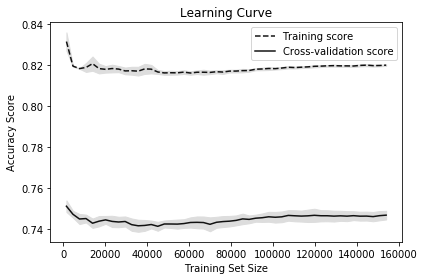

In [67]:
# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(k, 
                                                        features, 
                                                        target,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

Kmeans does not converge; try XGBoost.

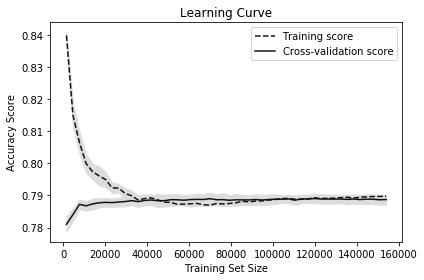

In [68]:
# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(xgbc, 
                                                        features, 
                                                        target,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

    * predict maximum loan amount the customer can or will pay off    

In [ ]:
# Loan Amount

from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
from sklearn.linear_model import Ridge, Lasso 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor
from sklearn import svm
from sklearn.linear_model import SGDRegressor
rid=Ridge(alpha=0.01)
lass=Lasso(alpha=0.01,max_iter=10e5)
k = KNeighborsRegressor()
log = LogisticRegression()
d = DecisionTreeRegressor()
r = RandomForestRegressor()
gbc = GradientBoostingRegressor()
xgbc = XGBRegressor()
svm = svm.SVR()
sgd = SGDRegressor()
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_validate,GridSearchCV  #Additional

x_train, x_test, y_train, y_test=train_test_split(features_amt,target_amt,test_size=0.2, random_state=42)

algorithms_reg = [rid,lass,k,log,d,r,gbc,xgbc,svm,sgd]
names_reg = ['Ridge', 'Lasso', 'K Nearest', 'Logistic','Single Tree','Random Forest','Gradient Boost','XGBoost','SVM','SGD']

def tDMRegressorasses(x_train=x_train, x_test=x_test, y_train=y_train, y_test=y_test,algorithms=algorithms,names=names):   
    #fit the data
    for i in range(len(algorithms)):
        algorithms[i]=algorithms[i].fit(x_train,y_train)
    #print metrics
    RMSE = []
    R2 = []
    for i in range(len(algorithms)):
        RMSE.append(mean_squared_error(y_test,algorithms[i].predict(x_test)))
        R2.append(r2_score(y_test,algorithms[i].predict(x_test)))          
    metrics_reg = pd.DataFrame(columns = ['RMSE', 'R2'],index = names)
    metrics_reg['RMSE'] = RMSE
    metrics_reg['R2'] = R2
    return metrics_reg.sort_values('RMSE', ascending = True)

tDMRegressorasses(x_train, x_test, y_train, y_test,algorithms_reg,names_reg)

xgbc = xgbc.fit(x_train,y_train)
RMSE = (mean_squared_error(y_test,xgbc.predict(x_test)))**0.5
R2 = r2_score(y_test,xgbc.predict(x_test))
print('RMSE = ', RMSE)
print('R2 = ', R2)

rid = rid.fit(x_train,y_train)
RMSE = (mean_squared_error(y_test,rid.predict(x_test)))**0.5
R2 = r2_score(y_test,rid.predict(x_test))
print('RMSE = ', RMSE)
print('R2 = ', R2)

svm = svm.fit(x_train,y_train)
RMSE = (mean_squared_error(y_test,svm.predict(x_test)))**0.5
R2 = r2_score(y_test,svm.predict(x_test))
print('RMSE = ', RMSE)
print('R2 = ', R2)

sgd = sgd.fit(x_train,y_train)
RMSE = (mean_squared_error(y_test,sgd.predict(x_test)))**0.5
R2 = r2_score(y_test,sgd.predict(x_test))
print('RMSE = ', RMSE)
print('R2 = ', R2)

from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error

import seaborn as sns

predictions = xgbc.predict(x_test)
print(f'R^2 score: {r2_score(y_true=y_test, y_pred=predictions):.2f}')
print(f'MAE score: {mean_absolute_error(y_true=y_test, y_pred=predictions):.2f}')
print(f'EVS score: {explained_variance_score(y_true=y_test, y_pred=predictions):.2f}')
rp = sns.regplot(x=y_test, y=predictions)